In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import sklearn
from scipy.stats import norm
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [118]:
df = pd.read_csv("data/flights.csv")

C:\Users\apurv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [119]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [120]:
pd.set_option('display.max_columns', None)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [122]:
df_airports = pd.read_csv("data/airports.csv")

In [123]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [124]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [125]:
df_airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [126]:
df_airports = df_airports.dropna(subset = ['LATITUDE','LONGITUDE'])
df_airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [127]:
print(f"Number of airports: {len(df['ORIGIN_AIRPORT'].unique())}")

Number of airports: 930


In [128]:
df_airlines = pd.read_csv('data/airlines.csv')

In [129]:
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [130]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [131]:
# grouping by CANCELLATION_REASON to see the ratio
df['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

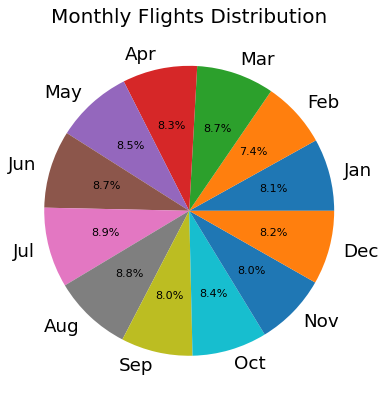

In [132]:
# plot the month distribution on a pie chart


figure(figsize=(10, 6), dpi=80)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.pie(x=df.groupby('MONTH').count()['FLIGHT_NUMBER'], autopct='%1.1f%%', labels=labels)
plt.title("Monthly Flights Distribution")

plt.show()

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)')]

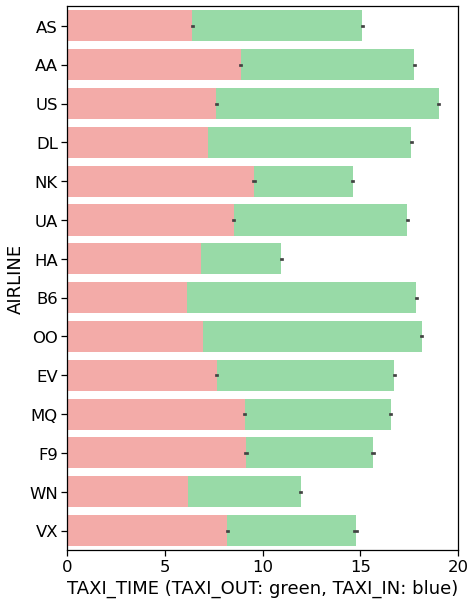

In [133]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(7,10))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=df, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=df, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")

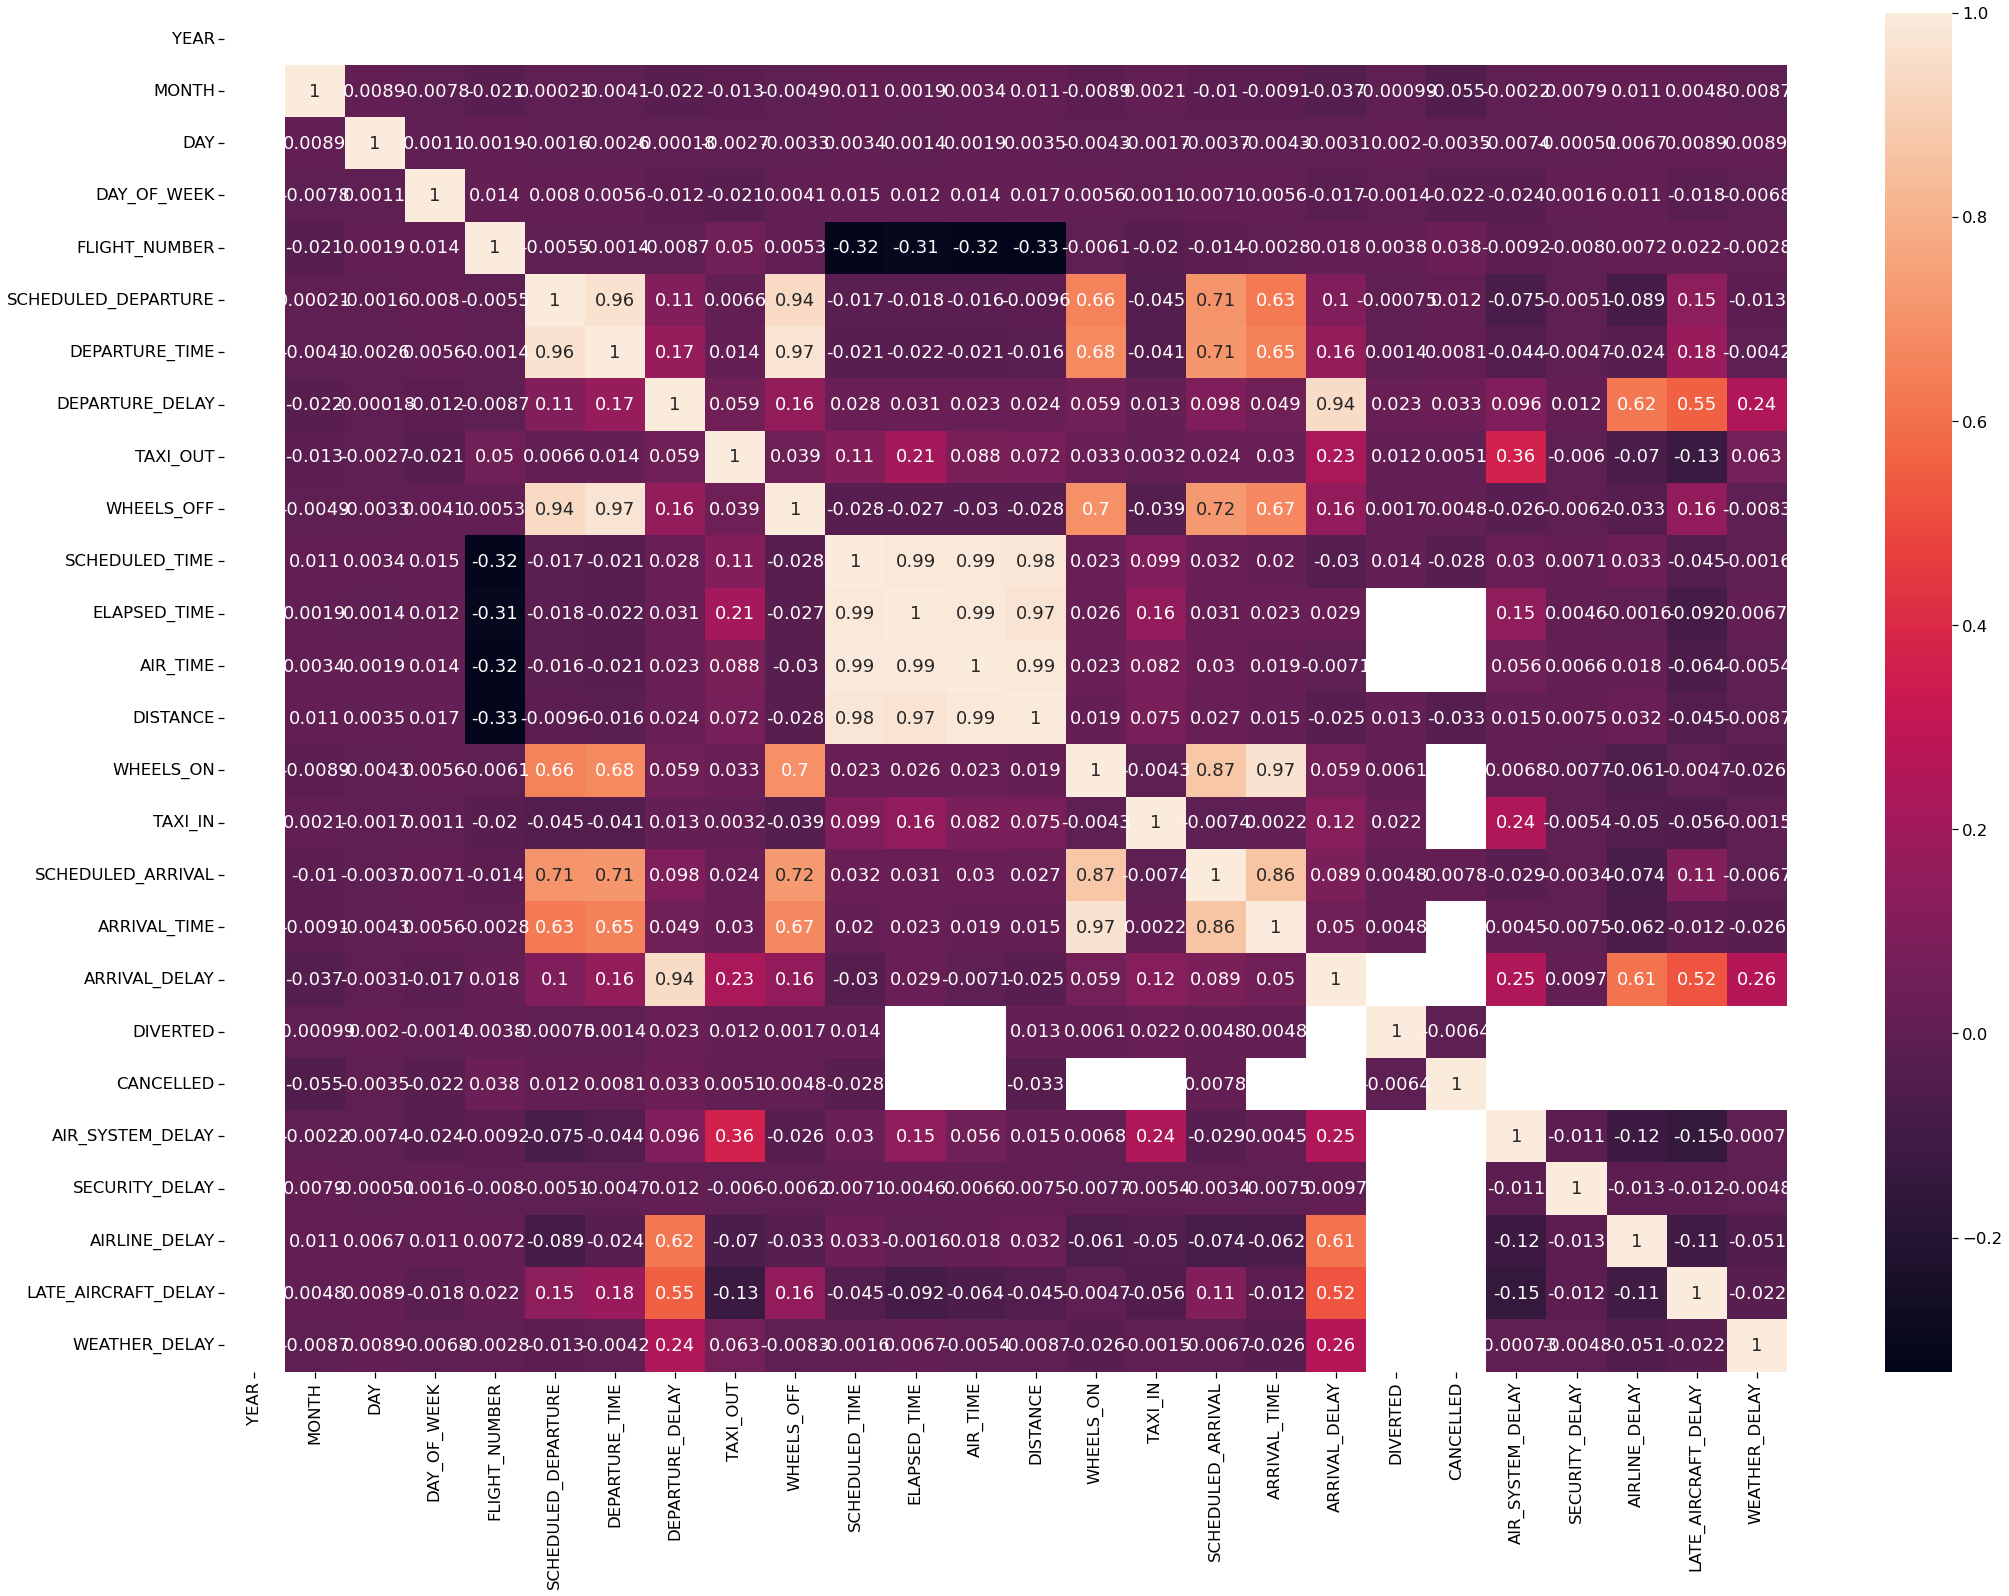

In [134]:
axis = plt.subplots(figsize=(35,25))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Arrival and Departure Delays

In [135]:
df_arr = pd.DataFrame({'avg_arrival_delay' : df.groupby(['AIRLINE'])['ARRIVAL_DELAY'].mean()}).reset_index()
df_dep = pd.DataFrame({'avg_departure_delay' : df.groupby(['AIRLINE'])['DEPARTURE_DELAY'].mean()}).reset_index()

[Text(0.5, 0, 'delay_time (arrival: red, departure: blue)')]

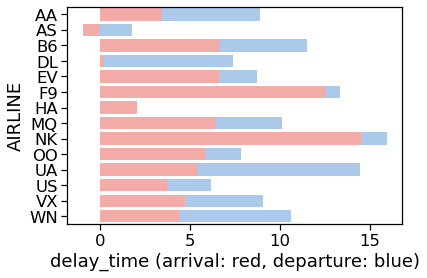

In [136]:
ax = sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="avg_departure_delay", y="AIRLINE", data=df_dep,
            label="accuracy", color="b")
ax = sns.barplot(x="avg_arrival_delay", y="AIRLINE", data=df_arr,
            label="accuracy", color="r")
ax.set(xlabel="delay_time (arrival: red, departure: blue)")

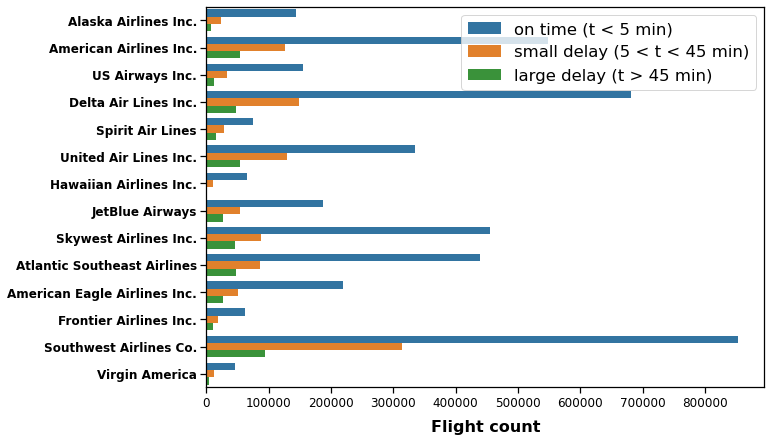

In [137]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
ig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)
abbr_companies = df_airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

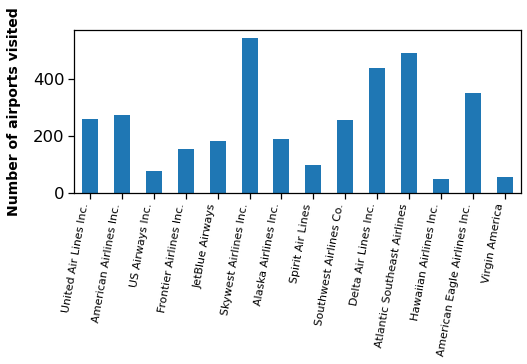

In [138]:
origin_nb = dict()
for carrier in abbr_companies.keys():
    liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(liste_origin_airport)


test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()


C:\Users\apurv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


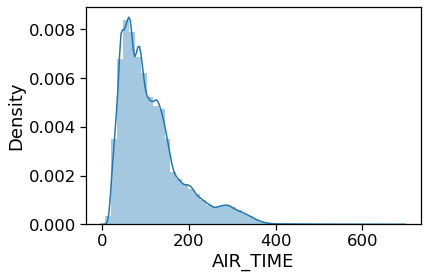

In [139]:
# To check the Distribution of Air Time
sns.distplot(df['AIR_TIME'])
plt.show()

C:\Users\apurv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


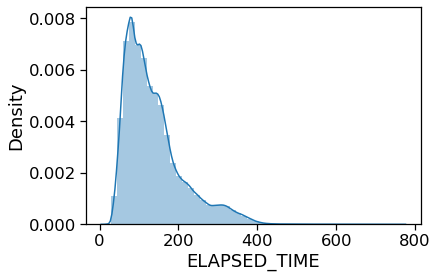

In [140]:
# To check the Distribution of Elapsed Time
sns.distplot(df['ELAPSED_TIME'])
plt.show()

C:\Users\apurv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


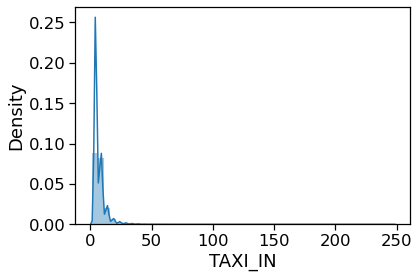

In [141]:
# To check the Distribution of Taxi IN
sns.distplot(df['TAXI_IN'])
plt.show()

C:\Users\apurv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


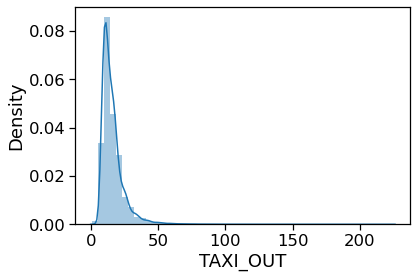

In [142]:
# To check the Distribution of Taxi OUT
sns.distplot(df['TAXI_OUT'])
plt.show()

In [143]:
# filtering out unnecessary columns
df1=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',\
             'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME',\
             'WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)

In [144]:
df1.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_LEVEL
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,0


In [145]:
# Handling missing values: replacing all NaN values with the mean of the attribute 
#df1=df1.fillna(df1.mean())

In [146]:
#df1 = df1.dropna()

In [147]:
df1.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_LEVEL
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,0


In [148]:
# removing some more columns
df2=df1.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
df2

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_LEVEL
0,1,1,5,-11.0,430,0,0,NaN,NaN,NaN,NaN,NaN,0
1,1,1,10,-8.0,750,0,0,NaN,NaN,NaN,NaN,NaN,0
2,1,1,20,-2.0,806,0,0,NaN,NaN,NaN,NaN,NaN,0
3,1,1,20,-5.0,805,0,0,NaN,NaN,NaN,NaN,NaN,0
4,1,1,25,-1.0,320,0,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,2359,-4.0,819,0,0,NaN,NaN,NaN,NaN,NaN,0
5819075,12,31,2359,-4.0,446,0,0,NaN,NaN,NaN,NaN,NaN,0
5819076,12,31,2359,-9.0,440,0,0,NaN,NaN,NaN,NaN,NaN,0
5819077,12,31,2359,-6.0,340,0,0,NaN,NaN,NaN,NaN,NaN,0


In [149]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY_LEVEL'],
      dtype='object')

In [150]:
df['Date'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])

In [151]:
df1 = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'DEPARTURE_TIME', 'Date', 'DAY', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_DELAY', 'ARRIVAL_TIME', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED']]

In [152]:
df["ORIGIN_AIRPORT"]

0          ANC
1          LAX
2          SFO
3          LAX
4          SEA
          ... 
5819074    LAX
5819075    JFK
5819076    JFK
5819077    MCO
5819078    JFK
Name: ORIGIN_AIRPORT, Length: 5819079, dtype: object

In [153]:
#Label encoding
le = LabelEncoder()
df1['AIRLINE']= le.fit_transform(df1['AIRLINE'])
df1['ORIGIN_AIRPORT'] = df1['ORIGIN_AIRPORT'].astype(str)
df1['ORIGIN_AIRPORT'] = le.fit_transform(df1['ORIGIN_AIRPORT'])
df1['DESTINATION_AIRPORT'] = df1['DESTINATION_AIRPORT'].astype(str)
df1['DESTINATION_AIRPORT'] = le.fit_transform(df1['DESTINATION_AIRPORT'])
df1['DAY'] = df1['DAY'].astype(str)
df1['DAY'] = le.fit_transform(df1['DAY'])

C:\Users\apurv\AppData\Local\Temp/ipykernel_24444/1918790237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AIRLINE']= le.fit_transform(df1['AIRLINE'])
C:\Users\apurv\AppData\Local\Temp/ipykernel_24444/1918790237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ORIGIN_AIRPORT'] = df1['ORIGIN_AIRPORT'].astype(str)
C:\Users\apurv\AppData\Local\Temp/ipykernel_24444/1918790237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [186]:
df2 = df1.drop(['SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL','ARRIVAL_TIME','Date','DEPARTURE_TIME'], axis = 1)

In [187]:
df2.isnull().sum()

AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
DISTANCE                    0
DAY                         0
DEPARTURE_DELAY         86153
ARRIVAL_DELAY          105071
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
TAXI_IN                 92513
TAXI_OUT                89047
DIVERTED                    0
dtype: int64

In [188]:
df2 = df2.dropna()

In [189]:
df2.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE', 'DAY',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

In [190]:
df2.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE', 'DAY',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

In [191]:
X = df2.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(5714008, 12)

In [192]:
df2.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DAY,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,1,323,584,1448,0,-11.0,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,0,482,542,2330,0,-8.0,-9.0,280.0,279.0,263.0,4.0,12.0,0
2,11,584,373,2296,0,-2.0,5.0,286.0,293.0,266.0,11.0,16.0,0
3,0,482,510,2342,0,-5.0,-9.0,285.0,281.0,258.0,8.0,15.0,0
4,1,583,324,1448,0,-1.0,-21.0,235.0,215.0,199.0,5.0,11.0,0


In [193]:
y = df2['ARRIVAL_DELAY']
y.head()

0   -22.0
1    -9.0
2     5.0
3    -9.0
4   -21.0
Name: ARRIVAL_DELAY, dtype: float64

### Splitting Data for Training and Testing

In [194]:
data = df2.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)  # splitting in the ratio 70:30

### Scaling

In [195]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

### Defining various Regressors

In [196]:
LinR = LinearRegression()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Las = Lasso()
Rid = Ridge()


### Model fitting and Metrics

In [200]:
#5 fold cross validation : LinearRegression
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold = LinearRegression()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])
print("LinearRegression Results")
print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

LinearRegression Results
Mean Absolute Error: -9.127449852138513e-07
Mean Squared Error: -7.000343907381885e-07
Root Mean Squared Error: -0.0003748755932131701
R2 :  0.8999999996036152


In [202]:
#5 fold cross validation : Decision Tree
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold =DecisionTreeRegressor()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])

print("DecisionTreeRegressor Results")
print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

DecisionTreeRegressor Results
Mean Absolute Error: -0.8927566885390215
Mean Squared Error: -7.973251492347484
Root Mean Squared Error: -2.809857119988551
R2 :  0.8467509896036987


In [203]:
#5 fold cross validation : lasso Regressor
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold =Lasso()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])

print("Lasso Regressor Results")
print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

Lasso Regressor Results
Mean Absolute Error: -7.2604807289207445
Mean Squared Error: -96.4890193197939
Root Mean Squared Error: -9.815053833284285
R2 :  0.867898960369865


In [204]:
#5 fold cross validation : Ridge Regressor
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold =Ridge()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])

print("Ridge Regressor Results")
print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

Ridge Regressor Results
Mean Absolute Error: -0.00014147438872417846
Mean Squared Error: -7.359480315259542e-07
Root Mean Squared Error: -0.0005292388600121689
R2 :  0.8899998960369865


In [208]:
5 fold cross validation : RandomForest Regressor
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold =RandomForestRegressor()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])


print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

RandomForestRegressor Results
Mean Absolute Error: -0.0001329028872417091
Mean Squared Error: -7.119480315259542e-07
Root Mean Squared Error: -0.0005012388600121689
R2 :  0.9108898960369864


### Analysis after dropping DEPARTURE_DELAY column:

In [209]:


df2 = df2.drop(['DEPARTURE_DELAY'], axis = 1)

X = df2.drop('ARRIVAL_DELAY',axis = 1)

y = df2['ARRIVAL_DELAY']


In [214]:
#5 fold cross validation : LinearRegression
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold = LinearRegression()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])
print("LinearRegression Results")
print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

LinearRegression Results
Mean Absolute Error: -18.60019867236782
Mean Squared Error: -1354.857863135497
Root Mean Squared Error: -36.717240397421016
R2 :  0.11804785035974155


In [215]:
#5 fold cross validation : Decision Tree
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold =DecisionTreeRegressor()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])

print("DecisionTreeRegressor Results")
print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

DecisionTreeRegressor Results
Mean Absolute Error: -26.86958556630727
Mean Squared Error: -3286.48441497536
Root Mean Squared Error: -57.30718717519072
R2 :  -1.1716448748223278


In [216]:
#5 fold cross validation : lasso Regressor
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold =Lasso()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])

print("Lasso Regressor Results")
print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

Lasso Regressor Results
Mean Absolute Error: -19.838633742934675
Mean Squared Error: -1437.085336934306
Root Mean Squared Error: -37.824242750985924
R2 :  0.06372543466188449


In [217]:
#5 fold cross validation : Ridge Regressor
sc1=StandardScaler()
X_sc=sc1.fit_transform(X)

from sklearn import model_selection
clf_dataMode_5fold =Ridge()
scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
                                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])

print("Ridge Regressor Results")
print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
print('R2 : ',np.mean(scores["test_r2"]))

Ridge Regressor Results
Mean Absolute Error: -18.599728147664052
Mean Squared Error: -1354.8422185924828
Root Mean Squared Error: -36.71703112550428
R2 :  0.11805811104004535


In [ ]:
# #5 fold cross validation : RandomForest Regressor
# sc1=StandardScaler()
# X_sc=sc1.fit_transform(X)

# from sklearn import model_selection
# clf_dataMode_5fold =RandomForestRegressor()
# scores = model_selection.cross_validate(clf_dataMode_5fold, X_sc, y, cv=5, 
#                                         scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"])

# print("RandomForestRegressor Results")
# print('Mean Absolute Error:', np.mean(scores["test_neg_mean_absolute_error"]))  
# print('Mean Squared Error:', np.mean(scores["test_neg_mean_squared_error"]))  
# print('Root Mean Squared Error:', np.mean(scores["test_neg_root_mean_squared_error"]))
# print('R2 : ',np.mean(scores["test_r2"]))

### Sentiment Analysis

#### 

In [104]:
#importing packages and downloading required nltk resources
%matplotlib inline 
import nltk
import pandas as pd
import json
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('maxent_ne_chunker')
nltk.download('words') 
nltk.download('treebank')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Pa

True

In [105]:
#reading the data from file
with open('data/json_tweet_data.json') as json_file:
    tlist = json.load(json_file)
    print(tlist)

["@averillalozano I'm sorry to hear about this experience PJL. May we ask for your flight number please so we could relay to relevant team?  We may delay any flight where we reasonably consider this to be justified by circumstances beyond our control or for reasons of safety and security.", '@SouthwestAir ANOTHER delay!!!! All day! Oversold flight by 23!!!!  So beyond dissatisfied! They can’t even keep us updated!! It’s 4:33!! https://t.co/d78GS5p9ap', '@Banty_OJ @MrN0va_ @jennerbythe_sea @drpenking Dana is actually good, just make sure you are take either the first or last flight of the day, if not delay of life', 'Jilted airline passengers banded together to make their destination the hard way.  https://t.co/vBDtoEaJLy', '@sueroberts7 Yes we did. They delay the flight n that was it. Machok (3 year old) was amazing. For the whole time….', '•Price Friendly Ticket Fares\n •Quality Of Customer Service \n • Flight Schedules\n (Arrival/Departure Times)\n •Loyalty Programs\n •Delay/Cancella

In [106]:
#creating a dataframe
df = pd.DataFrame({"text": tlist})

#removing stopwords from every tweet
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweet_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in 
                                                                     (stop)]))
df.head()

,text,tweet_without_stopwords
0,@averillalozano I'm sorry to hear about this e...,@averillalozano I'm sorry hear experience PJL....
1,@SouthwestAir ANOTHER delay!!!! All day! Overs...,@SouthwestAir ANOTHER delay!!!! All day! Overs...
2,@Banty_OJ @MrN0va_ @jennerbythe_sea @drpenking...,@Banty_OJ @MrN0va_ @jennerbythe_sea @drpenking...
3,Jilted airline passengers banded together to m...,Jilted airline passengers banded together make...
4,@sueroberts7 Yes we did. They delay the flight...,@sueroberts7 Yes did. They delay flight n it. ...


In [107]:
#calculating sentiment scores and making new dataframes
sid = SentimentIntensityAnalyzer()
scores = []
for sentence in df.tweet_without_stopwords:
    data = sid.polarity_scores(sentence)
    data['text'] = sentence
    scores += [data]
df = pd.DataFrame(scores)
df.head()

,neg,neu,pos,compound,text
0,0.100,0.582,0.319,0.7845,@averillalozano I'm sorry hear experience PJL....
1,0.176,0.824,0.000,-0.6182,@SouthwestAir ANOTHER delay!!!! All day! Overs...
2,0.107,0.651,0.242,0.4404,@Banty_OJ @MrN0va_ @jennerbythe_sea @drpenking...
3,0.135,0.865,0.000,-0.1027,Jilted airline passengers banded together make...
4,0.111,0.577,0.312,0.6369,@sueroberts7 Yes did. They delay flight n it. ...


In [108]:
#adding labels based on the compound score of every tweet
def label_sentiment(row):
    cutoff = .5
    if row.compound < -1 * cutoff:
        return "neg"
    elif row.compound > cutoff:
        return "pos"
    else:
        return "neu"
        
    
df["label"] = df.apply(label_sentiment, axis=1)
df
#showing tweets and their sentiment scores, and labels
print(df.to_string())

       neg    neu    pos  compound                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text label
0    0.100  0.582  0.319    0.7845                                                                                                                                                                                                                                                                                            @averillalozano I'm sorry hear experience PJL. May ask flight number please could relay relevant team? We may delay flight reasonably consider justifie

In [109]:
display(df)

,neg,neu,pos,compound,text,label
0,0.100,0.582,0.319,0.7845,@averillalozano I'm sorry hear experience PJL....,pos
1,0.176,0.824,0.000,-0.6182,@SouthwestAir ANOTHER delay!!!! All day! Overs...,neg
2,0.107,0.651,0.242,0.4404,@Banty_OJ @MrN0va_ @jennerbythe_sea @drpenking...,neu
3,0.135,0.865,0.000,-0.1027,Jilted airline passengers banded together make...,neu
4,0.111,0.577,0.312,0.6369,@sueroberts7 Yes did. They delay flight n it. ...,pos
...,...,...,...,...,...,...
995,0.157,0.767,0.077,-0.3313,@AmericanAir You pilot didn’t show - delay fli...,neu
996,0.277,0.723,0.000,-0.3182,@tatsugayaminagi I'll delay flight back two mo...,neu
997,0.402,0.598,0.000,-0.6571,Finally made DC!!! After missed flight delay 😫...,neg
998,0.187,0.813,0.000,-0.3182,"@JetBlue hi - two hour delay, TV flight LGA SA...",neu


In [110]:
sentiment_values = df['label'].value_counts().tolist()

In [111]:
import matplotlib.pyplot as plt
labels = 'Neutral', 'Negative', 'Positive'
sizes = sentiment_values
explode = (0, 0.1, 0) 

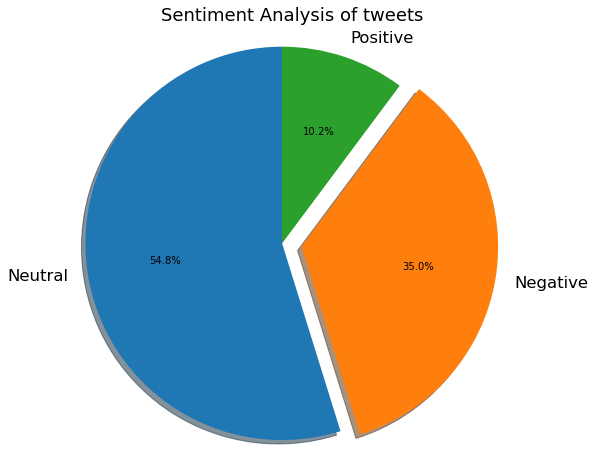

In [112]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sentiment Analysis of tweets")
plt.show()

In [113]:
sentiment_values

[548, 350, 102]

In [114]:
#Top negative tweets & scores:
print(df.sort_values(by='neg', ascending=False).head(20).to_string())
df.sort_values(by='neg', ascending=False).head(20)

       neg    neu    pos  compound                                                                                                                                                                                                                              text label
315  0.735  0.265  0.000   -0.6764                                                                                                                                                                                                         fucking delay flight piss   neg
325  0.697  0.303  0.000   -0.3182                                                                                                                                                                                                                      flight delay   neu
111  0.615  0.385  0.000   -0.7906                                                                                                                                                                     

,neg,neu,pos,compound,text,label
315,0.735,0.265,0.000,-0.6764,fucking delay flight piss,neg
325,0.697,0.303,0.000,-0.3182,flight delay,neu
111,0.615,0.385,0.000,-0.7906,@frac88ddxxxcchs deserved u fat fuck missed fl...,neg
747,0.605,0.395,0.000,-0.5574,"Flight delay, beg pun delay.",neg
844,0.577,0.423,0.000,-0.8020,Who tell flight fi delay drunk yah fuck 😭😭😭😭😭,neg
448,0.560,0.440,0.000,-0.6249,@cevababy wait broke wait flight delay ?,neg
149,0.556,0.444,0.000,-0.6124,@OnikoHamu Damn u right time delay flight.,neg
153,0.551,0.449,0.000,-0.4404,"@YonatanGray @IslesTickets Hey, sorry, flight....",neu
643,0.535,0.465,0.000,-0.3182,Flight delay 2 jam.mcbbb,neu
977,0.535,0.465,0.000,-0.3182,Loveeeee flight delay 😐,neu


In [115]:
#Top positive tweets & scores:
print(df.sort_values(by='pos', ascending=False).head(20).to_string())
df.sort_values(by='pos', ascending=False).head(20)

       neg    neu    pos  compound                                                                                                                                                                                                                                                                                                           text label
283  0.058  0.325  0.617    0.9731                                                                                                                                                             @JoseOso62808033 That's great! I hope delay last time! Have safe flight wonderful time! ✈ Happy flight! Hope get fun things, sightseeing, etc! 💫🥂😎   pos
280  0.000  0.447  0.553    0.9555                                                                                                                                                                @KristenKovu We're happy hear got assistance need, Kristen! Thank sharing experience us today. We hope great flight de

,neg,neu,pos,compound,text,label
283,0.058,0.325,0.617,0.9731,@JoseOso62808033 That's great! I hope delay la...,pos
280,0.000,0.447,0.553,0.9555,@KristenKovu We're happy hear got assistance n...,pos
329,0.066,0.402,0.531,0.9449,Honored excited part this. Already Johannesbur...,pos
929,0.141,0.368,0.491,0.6908,"@Qantas Thanks lot, although delay, flight com...",pos
838,0.000,0.512,0.488,0.5806,It would nice journey without train/flight delay.,pos
610,0.000,0.514,0.486,0.7668,"FYI, feels fucking amazing board flight 12 hou...",pos
28,0.065,0.479,0.456,0.9169,"@joshbroadbent54 Dear Josh, I would like since...",pos
91,0.135,0.412,0.453,0.6597,Hoping clear skies sa flight please 🤞🏻 unta di...,pos
796,0.105,0.455,0.441,0.7506,"@hib343434 Because look like angel God, one go...",pos
31,0.038,0.522,0.441,0.9877,@JanetJackson JUST HAD TO CALL TITO TO LET HIM...,pos


In [116]:
#Top neutral tweets & scores:
print(df.sort_values(by='neu', ascending=False).head(30).to_string())
df.sort_values(by='neu', ascending=False).head(30)

       neg    neu    pos  compound                                                                                                                                                                                                                                                                             text label
92   0.000  1.000  0.000    0.0000                                                                                                                                  The federal government extended deadline get REAL ID 2025. In Maine, requirement, could eventually need one get flight. https://t.co/wV8S6jUZOA   neu
825  0.000  1.000  0.000    0.0000                                                                                                                                                          @IndiGo6E Just announce flight arrival gate boarding...WTH...How compensate delay...?? @JM_Scindia @MoCA_GoI @DGCAIndia   neu
181  0.000  1.000  0.000    0.0000                        

,neg,neu,pos,compound,text,label
92,0.000,1.000,0.000,0.0000,The federal government extended deadline get R...,neu
825,0.000,1.000,0.000,0.0000,@IndiGo6E Just announce flight arrival gate bo...,neu
181,0.000,1.000,0.000,0.0000,@ScottFalco How day (besides flight delay),neu
341,0.000,1.000,0.000,0.0000,11/28: I flew DCA DFW (delayed 1 hr) DFW SJO (...,neu
524,0.000,1.000,0.000,0.0000,Flight Delay(Prod. By JmitchSoundz) #Producer ...,neu
530,0.000,1.000,0.000,0.0000,Sunday night flight delay… bar full. https://t...,neu
127,0.000,1.000,0.000,0.0000,"#realID The 2005 Real ID Act, mandates US trav...",neu
157,0.000,1.000,0.000,0.0000,The federal government extended deadline get R...,neu
158,0.000,1.000,0.000,0.0000,The federal government extended deadline get R...,neu
161,0.000,1.000,0.000,0.0000,#Real ID deadline extended -The 2005 Real ID A...,neu
